In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Memuat dataset dan meanmpilkan 5 baris pertama
df = pd.read_csv('telco_prep.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback,feedback_length,sentiment
0,0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,...,month-to-month,yes,electronic check,29.85,29.85,0,write a realistic customer feedback based on t...,i have been using the dsl internet service fro...,401,0.129545
1,1,5575-gnvde,male,0,no,no,34,yes,no,dsl,...,one year,no,mailed check,56.95,1889.50,0,write a realistic customer feedback based on t...,i have been a customer with this company for o...,399,0.170833
2,2,3668-qpybk,male,0,no,no,2,yes,no,dsl,...,month-to-month,yes,mailed check,53.85,108.15,1,write a realistic customer feedback based on t...,i recently signed up for dsl internet service ...,482,-0.228571
3,3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,...,one year,no,bank transfer (automatic),42.30,1840.75,0,write a realistic customer feedback based on t...,i have been a loyal customer with this company...,406,0.215801
4,4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,...,month-to-month,yes,electronic check,70.70,151.65,1,write a realistic customer feedback based on t...,i recently switched to this fiber optic intern...,418,0.030000


In [4]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [3]:
# Analysis Deskriptif
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,feedback_length,sentiment
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3520.737201,0.162400,32.421786,64.798208,2283.300441,0.265785,460.670080,0.175450
std,2033.431775,0.368844,24.545260,30.085974,2266.771362,0.441782,68.164461,0.128033
min,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000,277.000000,-0.312500
25%,1759.750000,0.000000,9.000000,35.587500,401.450000,0.000000,414.000000,0.103554
50%,3521.500000,0.000000,29.000000,70.350000,1397.475000,0.000000,454.000000,0.183333
75%,5281.250000,0.000000,55.000000,89.862500,3794.737500,1.000000,499.000000,0.260000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000,1.000000,840.000000,0.725000


In [6]:
# Cek missing values per fitur
print("\n missing values per fitur: ")
print(df.isnull().sum())


 missing values per fitur: 
Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
feedback_length     0
sentiment           0
dtype: int64


In [7]:
# Cek data duplikat
print("\nJumlah data duplikat: ", df.duplicated().sum())


Jumlah data duplikat:  0


##Data Visualisasi

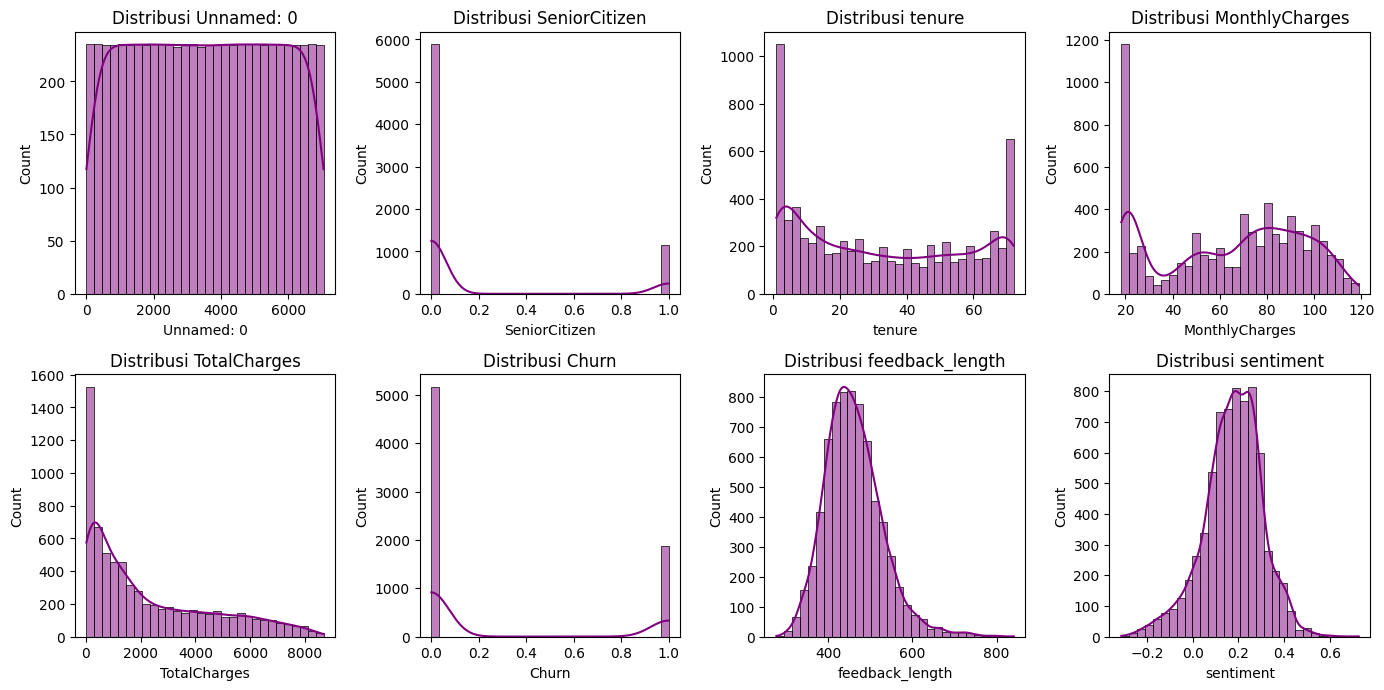

In [8]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

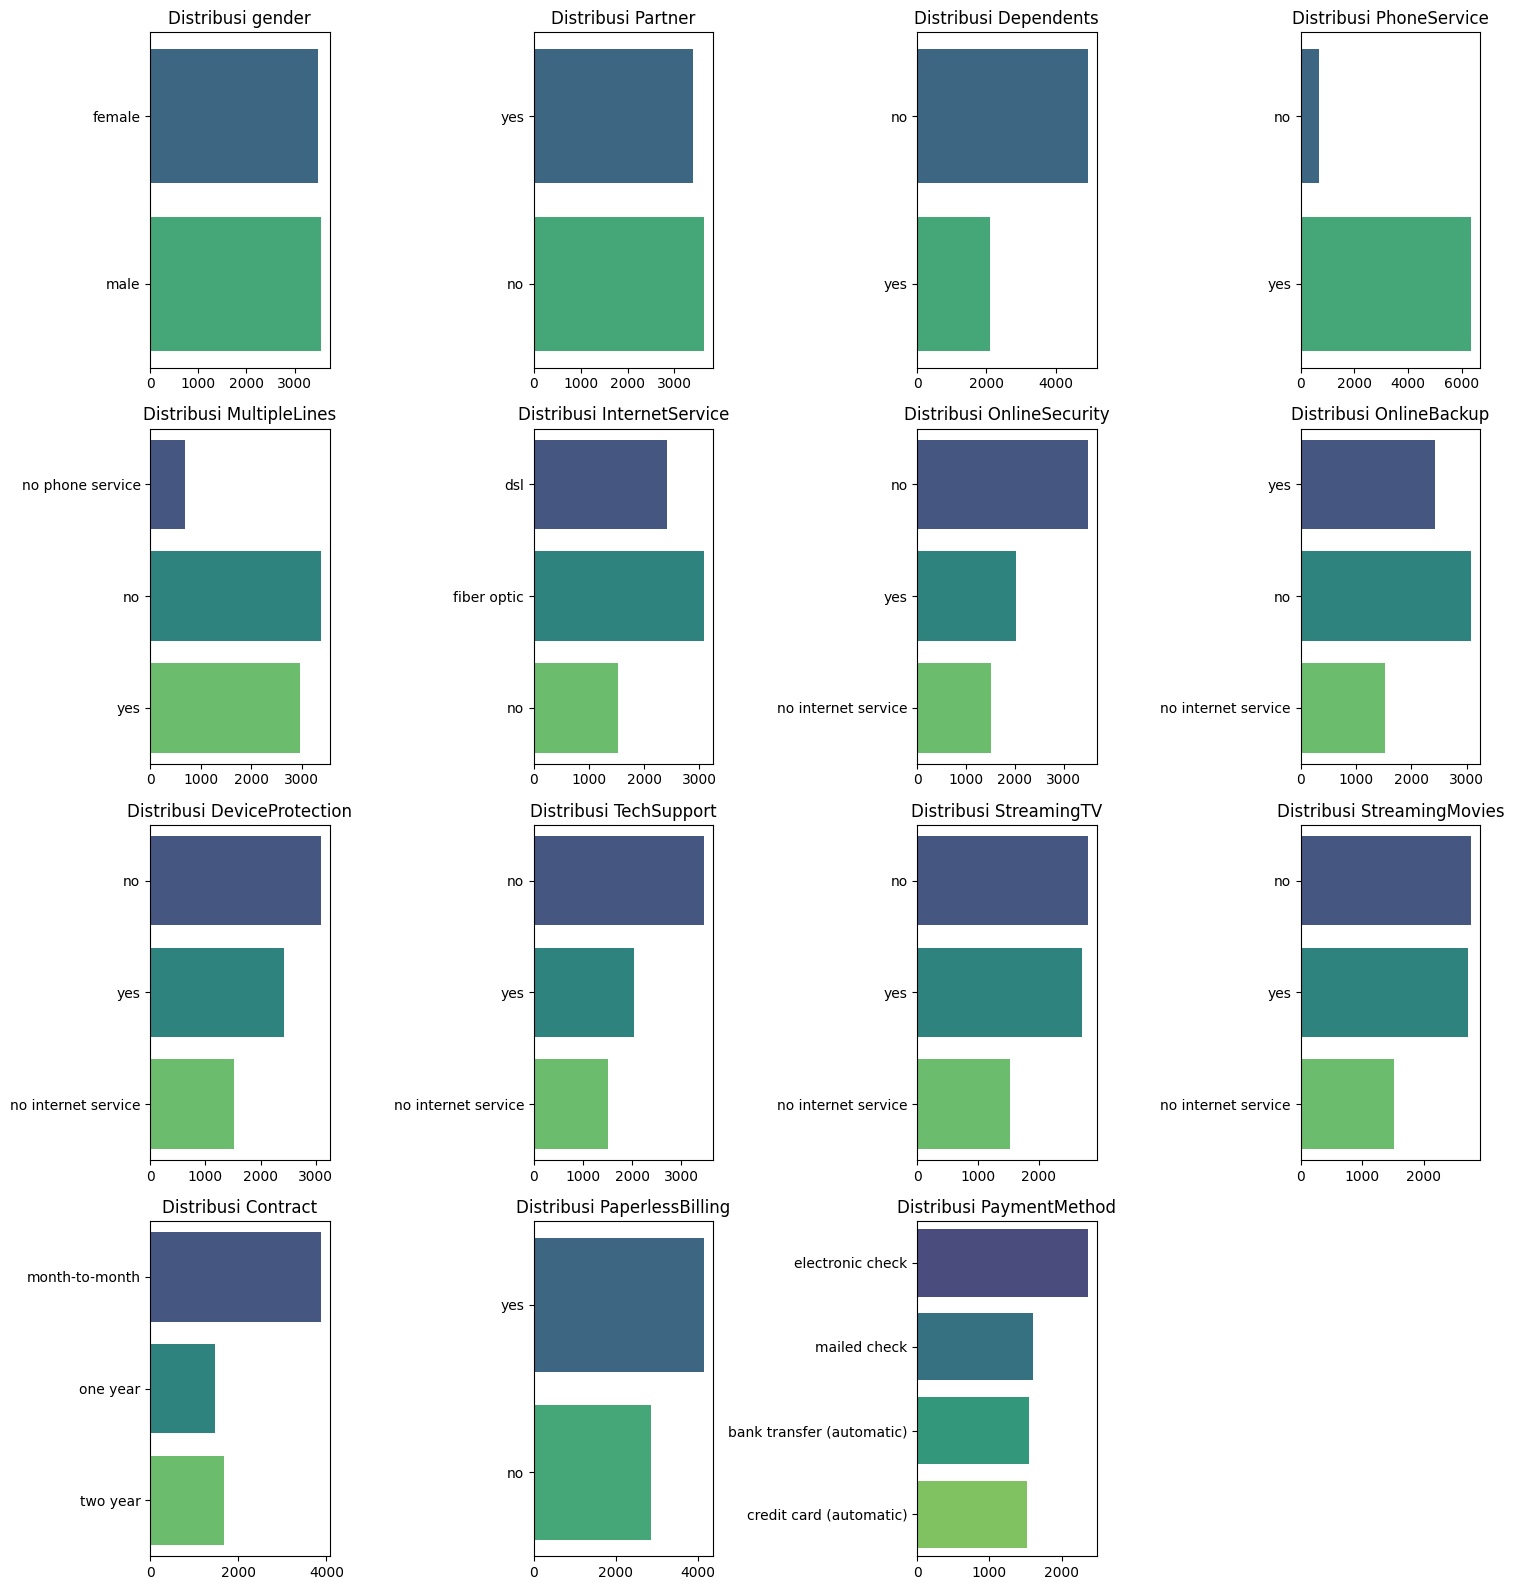

In [10]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=['object'])

# Remove 'customerID', 'PromptInput', and 'CustomerFeedback' from cat_features as they are not suitable for countplots
cat_features = cat_features.drop(columns=['customerID', 'PromptInput', 'CustomerFeedback'])

n_cat_features = len(cat_features.columns)
n_cols = 4  # You can adjust the number of columns
n_rows = (n_cat_features + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 4)) # Adjust figure size based on the number of rows

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    plt.xlabel('')
    plt.ylabel('')


plt.tight_layout()
plt.show()

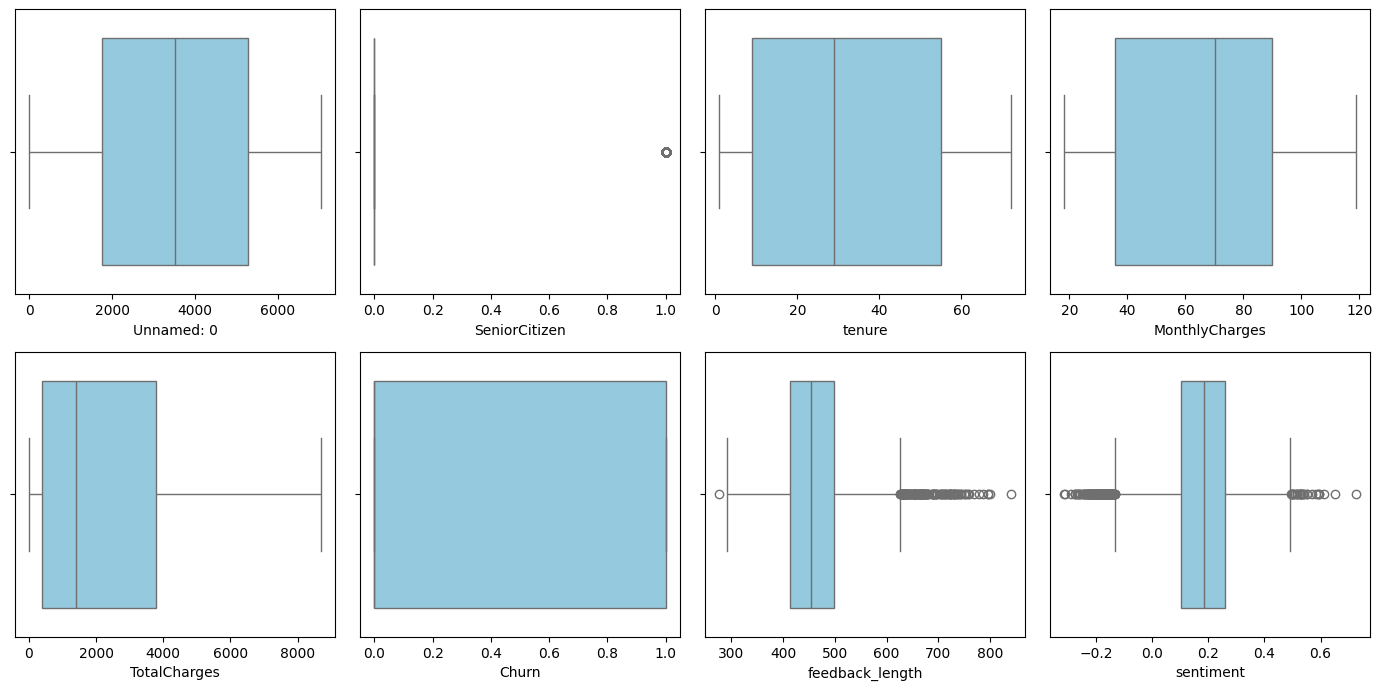

In [12]:
# Cek outlier pada dataset
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

plt.tight_layout()
plt.show()

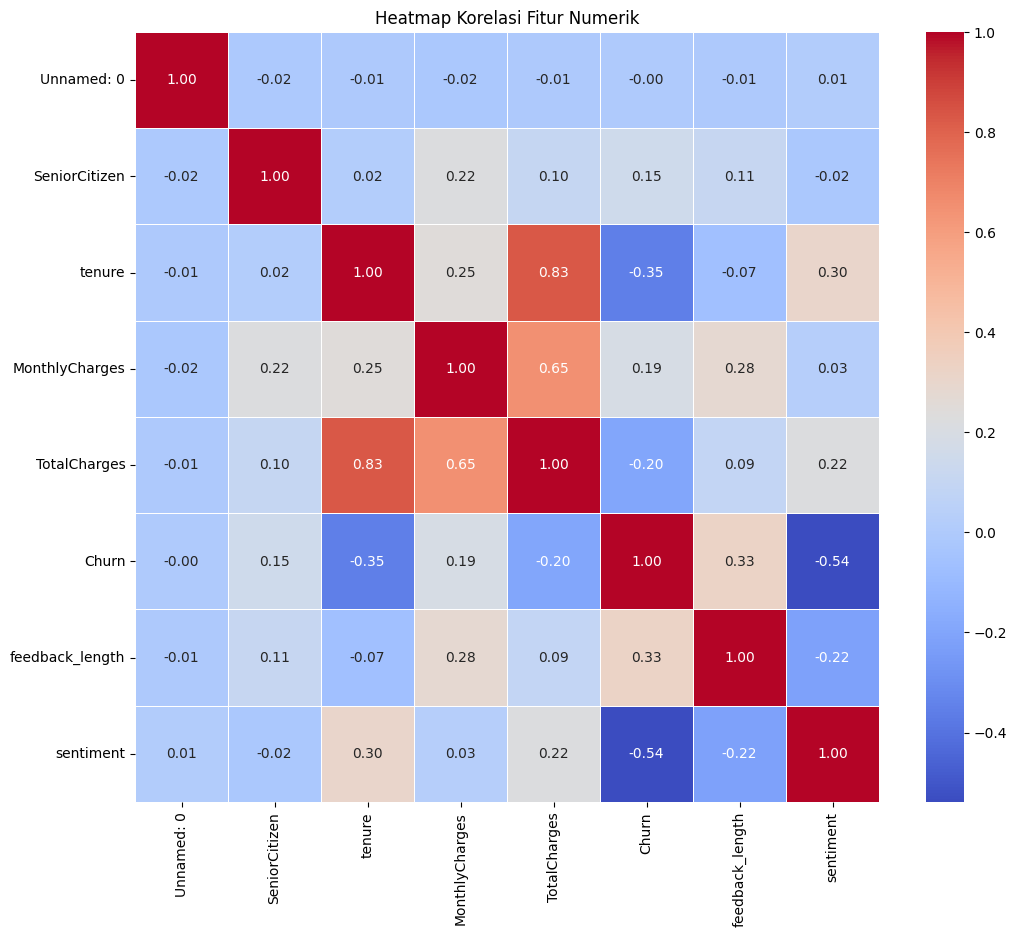

In [13]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

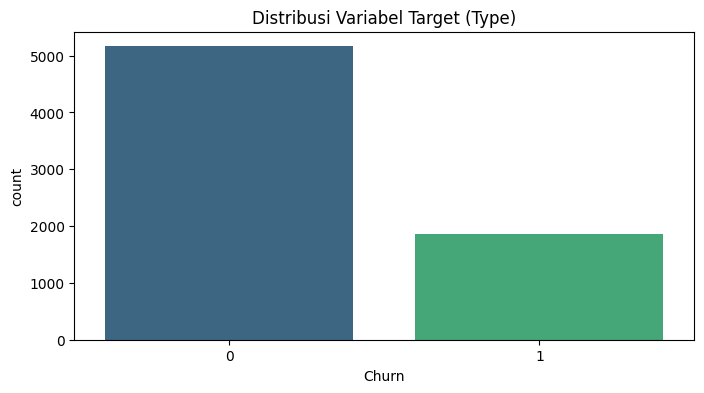

In [15]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Type)')
plt.show()

## Data Preprocessing

In [16]:
# Drop Column
df = df.drop(columns=['Unnamed: 0','customerID', 'PromptInput', 'CustomerFeedback'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,feedback_length,sentiment
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,...,no,no,month-to-month,yes,electronic check,29.85,29.85,0,401,0.129545
1,male,0,no,no,34,yes,no,dsl,yes,no,...,no,no,one year,no,mailed check,56.95,1889.50,0,399,0.170833
2,male,0,no,no,2,yes,no,dsl,yes,yes,...,no,no,month-to-month,yes,mailed check,53.85,108.15,1,482,-0.228571
3,male,0,no,no,45,no,no phone service,dsl,yes,no,...,no,no,one year,no,bank transfer (automatic),42.30,1840.75,0,406,0.215801
4,female,0,no,no,2,yes,no,fiber optic,no,no,...,no,no,month-to-month,yes,electronic check,70.70,151.65,1,418,0.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,female,0,no,no,1,yes,no,fiber optic,no,no,...,no,no,month-to-month,yes,electronic check,70.10,70.10,1,465,0.203500
7028,female,0,yes,yes,72,yes,yes,dsl,yes,yes,...,yes,yes,two year,no,credit card (automatic),89.75,6595.90,0,414,0.295833
7029,male,1,yes,no,60,yes,no,fiber optic,no,yes,...,yes,yes,one year,yes,electronic check,97.95,5867.00,0,456,0.222944
7030,female,0,yes,yes,11,yes,no,no,no internet service,no internet service,...,no internet service,no internet service,one year,yes,mailed check,20.00,196.35,0,391,0.300000


In [17]:
# Outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Data Splitting dan Transformer

In [20]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_features = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'feedback_length', 'sentiment']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [26]:
X_train_scaled.shape

(5625, 47)

In [27]:
X_test_scaled.shape

(1407, 47)

In [29]:
y_test

,Churn
2476,0
6773,1
6116,0
3047,1
4092,0
...,...
1728,0
5241,1
5456,1
5842,0


## Training Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
    'Logistic Regression (LR)': evaluate_model(model_lr,X_test_scaled, y_test),

}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                      Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression (LR)  0.891969   0.821538  0.739612  0.778426


In [34]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)

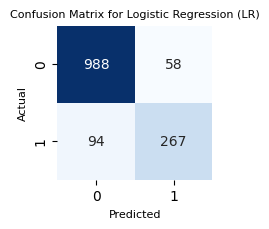

In [35]:
# Confusion Matrix dari model Stacking
lr_cm = results['Logistic Regression (LR)']['Confusion Matrix']
plot_confusion_matrix(lr_cm, 'Logistic Regression (LR)')

- True Positive (TP) = 998 ,Model berhasil memprediksi 998 pelanggan yang sebenarnya Churn.

- False Positive (FP) = 58, Model berhasil mempresiksi 58 pelanggan Churn tapi nyatanya pelanggan tersebut tidak Churn.

- True Negative (TN) = 267, Model berhasil memprediksi 267 pelanggan yang tidak Churn.

- False Negative (FN) = 94, Model berhasil memprediksi 94 pelanggan yang tidak Churn, tapi nyatanya pelanggan tersebut Churn.